In [81]:
import os
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates

In [82]:
url="https://data.cityofnewyork.us/resource/rc75-m7u3.json"
covid = requests.get(url)
covid = covid.json()
covid_data=pd.DataFrame(covid) 

covid_data.head(2)


,date_of_interest,case_count,hospitalized_count,death_count
0,2020-02-29T00:00:00.000,1,11,0
1,2020-03-01T00:00:00.000,0,4,0


In [83]:
covid_data[['Date','Time']] = covid_data["date_of_interest"].str.split("T",expand=True) 

covid_data.head(2)


,date_of_interest,case_count,hospitalized_count,death_count,Date,Time
0,2020-02-29T00:00:00.000,1,11,0,2020-02-29,00:00:00.000
1,2020-03-01T00:00:00.000,0,4,0,2020-03-01,00:00:00.000


In [84]:
clean_covid=covid_data.drop(columns=['date_of_interest', 'Time'], axis=1)
clean_covid.head(2)


,case_count,hospitalized_count,death_count,Date
0,1,11,0,2020-02-29
1,0,4,0,2020-03-01


In [85]:
clean_covid[['Year','Month',"Day"]] = clean_covid["Date"].str.split("-",expand=True) 
clean_covid.head(2)

,case_count,hospitalized_count,death_count,Date,Year,Month,Day
0,1,11,0,2020-02-29,2020,02,29
1,0,4,0,2020-03-01,2020,03,01


In [86]:
final_covid=clean_covid.drop(columns=['Date'], axis=1)
final_covid.head(2)

,case_count,hospitalized_count,death_count,Year,Month,Day
0,1,11,0,2020,02,29
1,0,4,0,2020,03,01


In [87]:
march_covid_data = final_covid.loc[(clean_covid["Month"] == "03"), :]
march_covid_data.head(2)

,case_count,hospitalized_count,death_count,Year,Month,Day
1,0,4,0,2020,03,01
2,0,21,0,2020,03,02


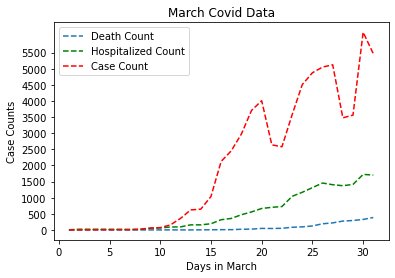

In [96]:

labels = march_covid_data["Day"].astype('int')

case_count = march_covid_data["case_count"].astype('int')
hospitalized_count = march_covid_data["hospitalized_count"].astype('int')
death_count = march_covid_data["death_count"].astype('int')



plt.plot(labels,death_count, "--", label="Death Count")
plt.plot(labels,hospitalized_count, "g--", label="Hospitalized Count")
plt.plot(labels,case_count, "r--", label="Case Count")

plt.yticks(np.arange(0,6000,500),np.arange(0,6000,500))

plt.title("March Covid Data")
plt.xlabel("Days in March")
plt.ylabel("Case Counts")
plt.legend()
plt.savefig("March Covid Data.png")
plt.show()

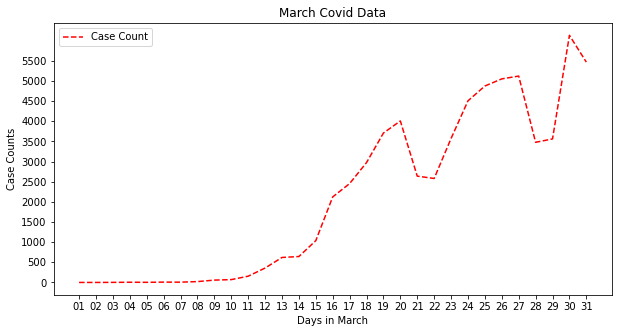

In [89]:
labels = march_covid_data["Day"]
case_count = march_covid_data["case_count"].astype('int')

plt.figure(figsize=(10,5))
plt.plot(labels,case_count, "r--", label="Case Count")

plt.yticks(np.arange(0,6000,500),np.arange(0,6000,500))

plt.title("March Covid Data")
plt.xlabel("Days in March")
plt.ylabel("Case Counts")
plt.legend()


plt.show()

In [90]:
data = "resources/NYPD_Arrest_Data__Year_to_Date_.csv"
nypd_data = pd.read_csv(data)
nypd_data.head(2)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,214353678,06/18/2020,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,K,68,0,18-24,F,WHITE HISPANIC,978016,172087,40.639022,-74.022464,POINT (-74.02246352399999 40.63902167200007)
1,210517846,03/04/2020,969.0,"TRAFFIC,UNCLASSIFIED INFRACTIO",881.0,OTHER TRAFFIC INFRACTION,VTL051101A,M,M,10,0,25-44,M,BLACK HISPANIC,984331,209268,40.741077,-73.999709,POINT (-73.99970914499994 40.74107715900004)


In [91]:
nypd_data[['Month','Day',"Year"]] = nypd_data["ARREST_DATE"].str.split("/",expand=True) 
nypd_data.head(2)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,...,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,Month,Day,Year
0,214353678,06/18/2020,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,K,68,...,F,WHITE HISPANIC,978016,172087,40.639022,-74.022464,POINT (-74.02246352399999 40.63902167200007),06,18,2020
1,210517846,03/04/2020,969.0,"TRAFFIC,UNCLASSIFIED INFRACTIO",881.0,OTHER TRAFFIC INFRACTION,VTL051101A,M,M,10,...,M,BLACK HISPANIC,984331,209268,40.741077,-73.999709,POINT (-73.99970914499994 40.74107715900004),03,04,2020


In [92]:
clean_nypd_data = nypd_data[['OFNS_DESC','PERP_SEX','Month','Day',"Year"]]
clean_nypd_data.head(2)

,OFNS_DESC,PERP_SEX,Month,Day,Year
0,FELONY ASSAULT,F,06,18,2020
1,OTHER TRAFFIC INFRACTION,M,03,04,2020


In [93]:
march_nypd_data = clean_nypd_data.loc[(clean_nypd_data["Month"] == "03"),:]
march_nypd_data.head(2)

,OFNS_DESC,PERP_SEX,Month,Day,Year
1,OTHER TRAFFIC INFRACTION,M,03,04,2020
7,PETIT LARCENY,M,03,10,2020


In [94]:

group_ofns = march_nypd_data.groupby("Day")
count_ofns = group_ofns["OFNS_DESC"].count()
count_ofns.head(2)

Day
01    407
02    531
Name: OFNS_DESC, dtype: int64

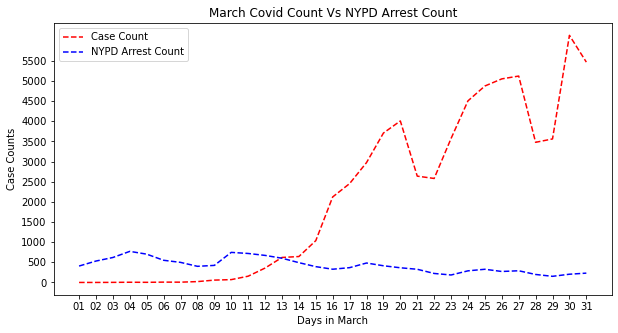

In [97]:
labels = march_covid_data["Day"]
case_count = march_covid_data["case_count"].astype('int')

plt.figure(figsize=(10,5))
plt.plot(labels,case_count, "r--", label="Case Count")
plt.plot(labels,count_ofns,"b--",label="NYPD Arrest Count")
plt.yticks(np.arange(0,6000,500),np.arange(0,6000,500))

plt.title("March Covid Count Vs NYPD Arrest Count")
plt.xlabel("Days in March")
plt.ylabel("Case Counts")
plt.legend()
plt.savefig("March Covid Count Vs NYPD Arrest Count.png")

plt.show()
plt.show()